# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.externals import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 6

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangeme

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  6
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_13L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_17L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_1L.bmp
        193002-9p12q13_24L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_14L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_22L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_3L.bmp
        W0739

### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

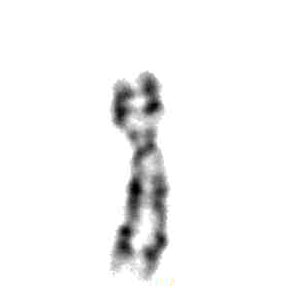

In [10]:
image['chr_09'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [12]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [13]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [16]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [17]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_09': 0,                
                'chr_9_inversion': 1
               }

In [19]:
chromConvert_reverse = {0: 'chr_09',
                        1: 'chr_9_inversion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

372

In [25]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [26]:
start = time.time()



clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [27]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-2.16840434e-19 -2.16840434e-19 -2.16840434e-19 ... -2.16840434e-19
   4.16713740e-19  4.16713740e-19]]
b =  [-2.46874141]
Indices of support vectors =  [  1  33  38  42  49  53  54  58  62  66  67  68  73  90  94  96 105 107
 108 109 124 139 158 165 168 173 175 184 185 187 191 193 200 203 204 209
 210 212 213 215 220 221 225 227 229 230 231 234 241 245 254 257 264 267
 273 281 282 285 286 288 289 291 307 310 316 322 325 327 328 330 340 346
 347 352 354 362 368 371]
Support vectors =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Number of support vectors for each class =  [42 36]
Coefficients of the support vector in the decision function =  [[9.28084787e-08 4.72021123e-08 5.05811679e-09 1.39617534e-07
  4.87008926e-07 4.75795020e-08 2.60969952e-07 1.12646591e-07
  8.23849825e-08 7.94613179e-07 1.89

## 3.8 Save the Model

In [28]:
c = joblib.dump(clf, 'model_allClass_svm_iteration_'+str(iterationNumber))
print(c)

['model_allClass_svm_iteration_6']


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

## 3.9 Load the Model

In [29]:
model_reload = joblib.load('model_allClass_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [30]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.918


In [31]:
len(X_test)

61

In [32]:
y_predict = model_reload.predict(X_test)

In [33]:
len(y_predict)

61

# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [34]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [35]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.92      0.95      0.93        37
chr_9_inversion       0.91      0.88      0.89        24

      micro avg       0.92      0.92      0.92        61
      macro avg       0.92      0.91      0.91        61
   weighted avg       0.92      0.92      0.92        61



### 3.10.3. Confusion Matrix

In [36]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,35,2
chr_9_inversion,3,21


### 3.10.4 Rate of Confusion Matrix

In [37]:
subtotal = [0] * 2 
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [38]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [39]:
cm_array = np.array(cm_r)

In [40]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion_r

,chr_09,chr_9_inversion
chr_09,0.945946,0.054054
chr_9_inversion,0.125000,0.875000


#### Heat Map: Number

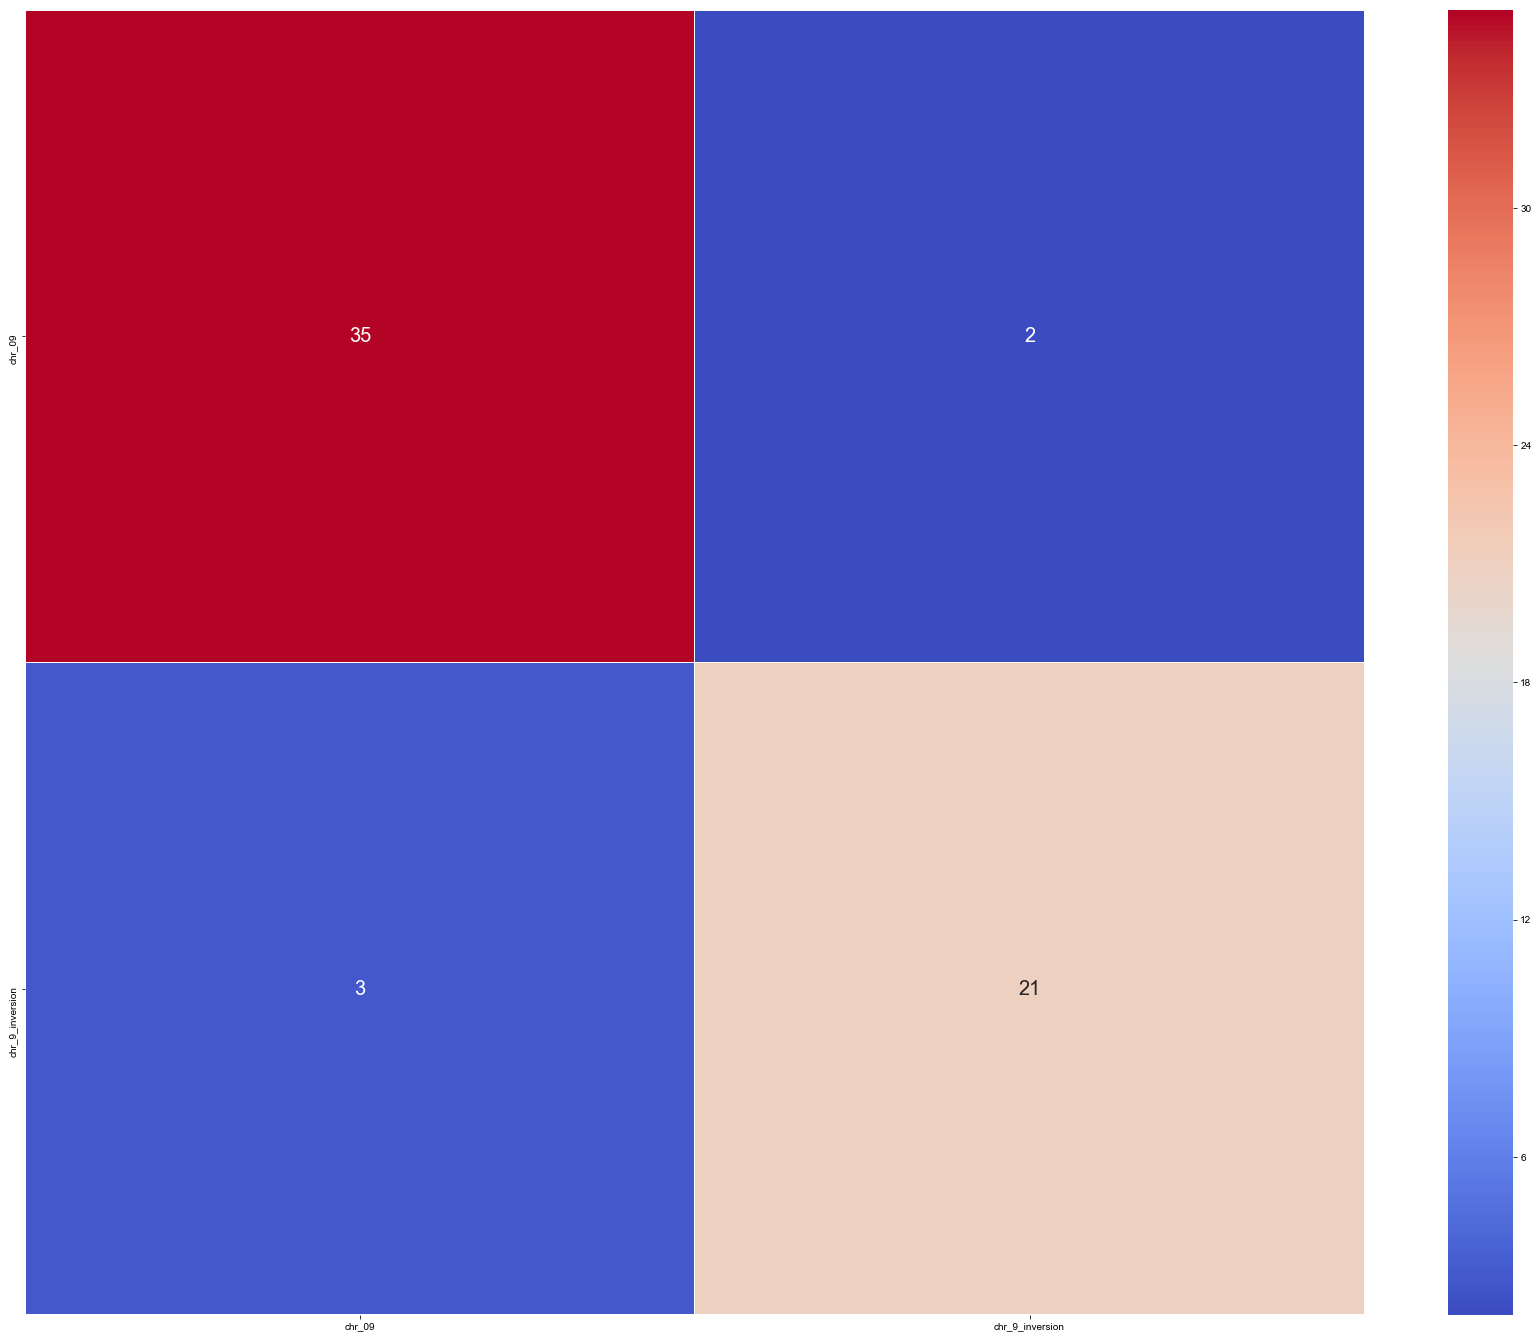

In [41]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

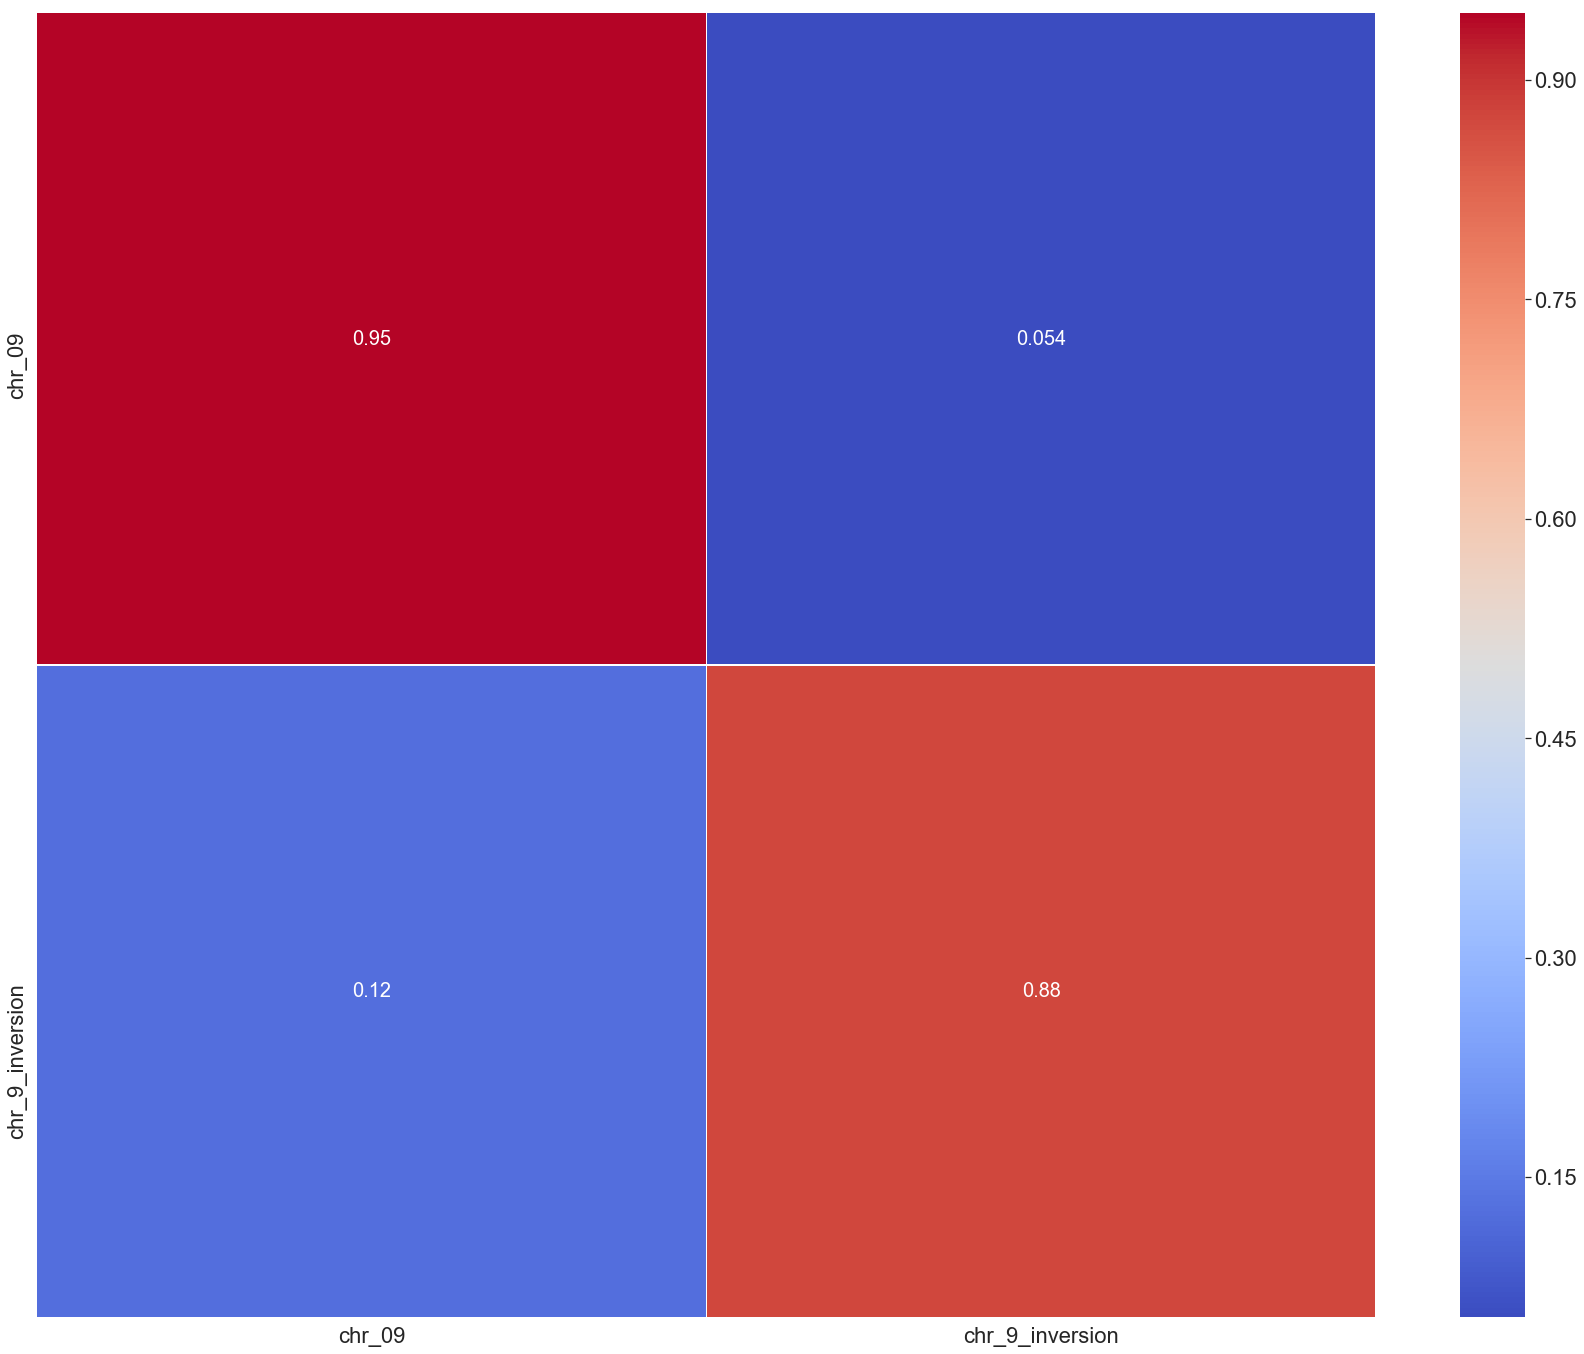

In [42]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [43]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [44]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [45]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.918


In [46]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.92      0.95      0.93        37
chr_9_inversion       0.91      0.88      0.89        24

      micro avg       0.92      0.92      0.92        61
      macro avg       0.92      0.91      0.91        61
   weighted avg       0.92      0.92      0.92        61



In [47]:
type(performanceReport)

str

In [48]:
confusion

,chr_09,chr_9_inversion
chr_09,35,2
chr_9_inversion,3,21


## Export to a text file

In [49]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()